#  ASSIGNMENT 04
# FATIMA TASNEEM
# AI-304 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:




df = pd.read_csv('housing.csv')
df.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
X = df[['longitude', 'latitude']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.32783522,  1.05254828],
       [-1.32284391,  1.04318455],
       [-1.33282653,  1.03850269],
       ...,
       [-0.8237132 ,  1.77823747],
       [-0.87362627,  1.77823747],
       [-0.83369581,  1.75014627]])

In [6]:
 # K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_



In [8]:

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {silhouette_kmeans}')




K-Means Silhouette Score: 0.6467062442107521


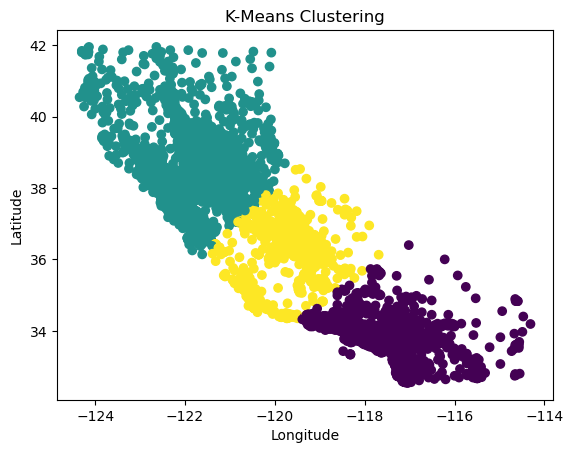

In [10]:
plt.scatter(df['longitude'], df['latitude'], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [12]:
#  DBSCAN Clustering 
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_



In [14]:

if len(set(dbscan_labels)) > 1:  
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {silhouette_dbscan}')
else:
    print("DBSCAN resulted in a single cluster, cannot compute Silhouette Score.")



DBSCAN Silhouette Score: 0.13847891632769344


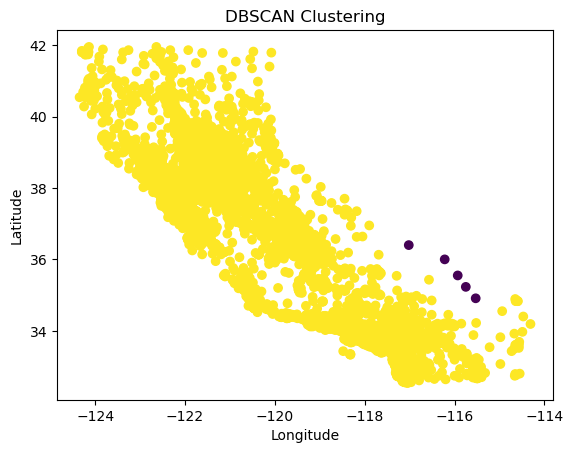

In [15]:

plt.scatter(df['longitude'], df['latitude'], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [18]:
!pip install kmedoids


   ---------------------------------------- 0.0/378.9 kB ? eta -:--:--
   ------ --------------------------------- 61.4/378.9 kB 3.2 MB/s eta 0:00:01
   --------- ------------------------------ 92.2/378.9 kB 1.1 MB/s eta 0:00:01
   ----------- -------------------------- 112.6/378.9 kB 930.9 kB/s eta 0:00:01
   ------------ ------------------------- 122.9/378.9 kB 798.9 kB/s eta 0:00:01
   -------------- ----------------------- 143.4/378.9 kB 607.9 kB/s eta 0:00:01
   -------------- ----------------------- 143.4/378.9 kB 607.9 kB/s eta 0:00:01
   --------------- ---------------------- 153.6/378.9 kB 508.4 kB/s eta 0:00:01
   ----------------- -------------------- 174.1/378.9 kB 436.9 kB/s eta 0:00:01
   ----------------- -------------------- 174.1/378.9 kB 436.9 kB/s eta 0:00:01
   ----------------- -------------------- 174.1/378.9 kB 436.9 kB/s eta 0:00:01
   ------------------- ------------------ 194.6/378.9 kB 368.6 kB/s eta 0:00:01
   -------------------- ----------------- 204.8/378

In [30]:
from kmedoids import KMedoids
from sklearn.metrics import pairwise_distances

In [34]:
distance_matrix = pairwise_distances(X_scaled)

n_clusters = 3  
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids.fit(distance_matrix)

labels = kmedoids.labels_

df['Cluster'] = labels

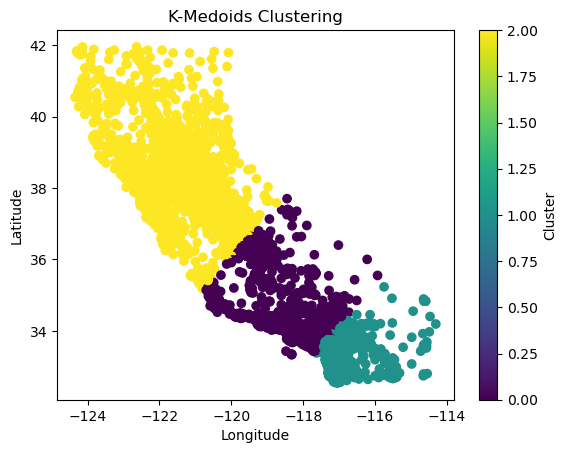

In [36]:

plt.scatter(df['longitude'], df['latitude'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Medoids Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [38]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6077592136113017
